# The Billionaire Problem

In recent years, billionaires have gone from objects of admiration to outright villians in certain political and social circles. The (over?)simplified idea is that we have "a billionaire problem" in our society, i.e. they are a sign of massive income/wealth inequality and a failure of capitalism to provide general prosperity. Is this true? This notebook tries to interrogate that question.



In [116]:
# Import the necessary modules for this notebook

from pprint import pprint

import pandas as pd
from bs4 import BeautifulSoup
import requests
import seaborn as sns


## Billionaires vs. Unions

> *Billionaires don't make money. They take money.*
>
> — Alexandria Ocasio-Cortez

The idea behind this is that billionaires have made their money by suppressing wages. In short, they are able to take more than their fair share of revenues, inflating profites, thus building their net worth. (It is out of scope of this notebook to examine why this analysis of how wage markets work is problematic.) A reasonable hypothesis would be that where collective agreement coverage is low, wages are suppressed because there is no union power to offset the power of billionaires to set wages to their liking. Collective agreement coverage or union representation refers to the proportion of people in a country population whose terms and conditions at work are made by collective bargaining, between an employer and a trade union, rather than by individual contracts.[^1]

Let's see if the data bear this out. We turn to the Wikipedia page on [Collective Agreement Coverage](https://en.wikipedia.org/wiki/Collective_agreement_coverage).

In [117]:
# Parse the Collective Agreement Coverage page
with requests.get("https://en.wikipedia.org/wiki/Collective_agreement_coverage") as response:
    soup = BeautifulSoup(response.content, "html.parser")

# Find the table with the data we want
cac_table = soup.find(string='Collective bargaining coverage in OECD countries').find_parent('table')
cac_table

<table class="wikitable sortable">
<caption>Collective bargaining coverage in OECD countries<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</caption>
<tbody><tr>
<th>Country</th>
<th>Coverage (%)</th>
<th>Year
</th></tr>
<tr>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="640" data-file-width="1280" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/23px-Flag_of_Australia_%28converted%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/35px-Flag_of_Australia_%28converted%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_Australia_%28converted%29.svg/46px-Flag_of_Australia_%28converted%29.svg.png 2x" width="23"/> </span><a href="/wiki/Australia" title="Australia">Australia</a></td>
<td>61.2</td>
<td>2018
</td></tr>
<tr>
<td><span class="flagicon"><img alt="" class="thumbbor

In [118]:
cac_df = pd.concat(pd.read_html(str(cac_table), flavor="bs4"))
cac_df

,Country,Coverage (%),Year
0,Australia,61.2,2018
1,Austria,98.0,2019
2,Belgium,96.0,2019
3,Canada,31.3,2020
4,Chile,20.4,2018
5,Colombia,15.7,2016
6,Czech Republic,34.7,2019
7,Denmark,82.0,2018
8,Estonia,6.1,2018
9,Finland,88.8,2017


In [119]:
cac_df['Coverage (%)'].describe()

count     39.000000
mean      45.205128
std       32.292014
min        6.100000
25%       16.250000
50%       32.100000
75%       77.100000
max      100.000000
Name: Coverage (%), dtype: float64

In [120]:
cac_df.set_index("Country", inplace=True)
cac_df.sort_values("Coverage (%)", ascending=False, inplace=True)
cac_df

,Coverage (%),Year
Country,,
Italy,100.0,2019
Austria,98.0,2019
France,98.0,2018
Belgium,96.0,2019
Iceland,90.0,2019
Finland,88.8,2017
Sweden,88.0,2018
Denmark,82.0,2018
Spain,80.1,2018


<AxesSubplot: xlabel='Coverage (%)', ylabel='Country'>

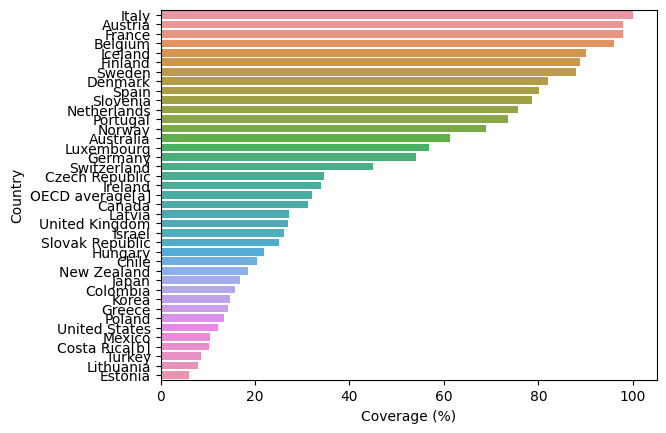

In [121]:
sns.barplot(y=cac_df.index, x=cac_df['Coverage (%)'], orient="h")

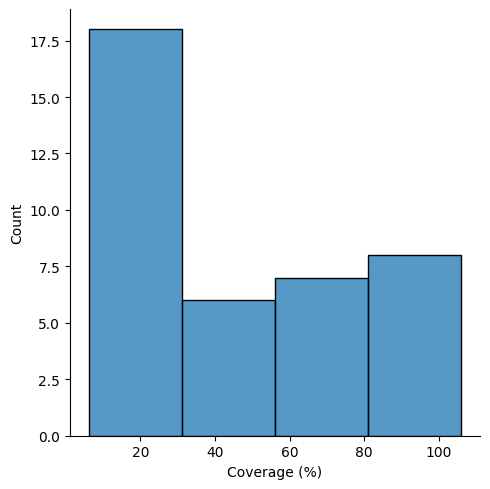

In [122]:
sns.displot(cac_df['Coverage (%)'], binwidth=25)

In [123]:
cac_df['Unionization'] = pd.cut(cac_df['Coverage (%)'], range(0, 105, 20), labels=['VERY WEAK', 'WEAK', 'NEUTRAL', 'STRONG', 'VERY STRONG'])
cac_df

,Coverage (%),Year,Unionization
Country,,,
Italy,100.0,2019,VERY STRONG
Austria,98.0,2019,VERY STRONG
France,98.0,2018,VERY STRONG
Belgium,96.0,2019,VERY STRONG
Iceland,90.0,2019,VERY STRONG
Finland,88.8,2017,VERY STRONG
Sweden,88.0,2018,VERY STRONG
Denmark,82.0,2018,VERY STRONG
Spain,80.1,2018,VERY STRONG


<AxesSubplot: xlabel='Unionization', ylabel='Count'>

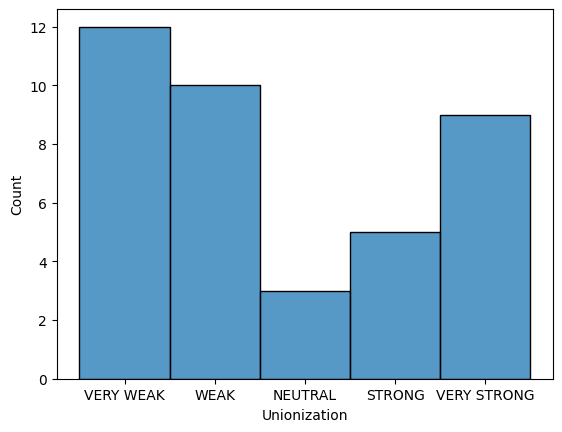

In [124]:
sns.histplot(cac_df['Unionization'])

## Footnotes

[^1]: https://en.wikipedia.org/wiki/Collective_agreement_coverage